# 1. Description of problem 

Young's Modulus is one of the basis material parameter. It describes the behavior of material under load in a range of applying Hook's law. The most common classification of materials determines plastic and elastic materials. In this notebook, I will focus on plastic materials, which are harder to analyze because of not fixed yield strength. 

# 2. Importing libraries 

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# 3. Loading data

Tabular data of relation between stress(force) and displacment (elongation) can be gathered from a machine that perform static elongation of material sample. 

In [2]:
# Sample CSV file from GitHub repository :

url = 'https://raw.githubusercontent.com/paruds/Youngs_Modulus_for_plastic_materials/main/CSV/6061_1.csv'

In [5]:
dataset = pd.read_csv(url)

In [6]:
# Printing dataset head to take look on data loaded in

dataset.head()

,Strain,Stress_MPa
0,-0.000217,0.399656
1,-0.000216,0.405594
2,-0.000220,0.411623
3,-0.000217,0.416826
4,-0.000223,0.421931


In [8]:
# Printing dataset info to see datatypes of values

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955 entries, 0 to 954
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Strain      955 non-null    float64
 1   Stress_MPa  955 non-null    float64
dtypes: float64(2)
memory usage: 15.0 KB


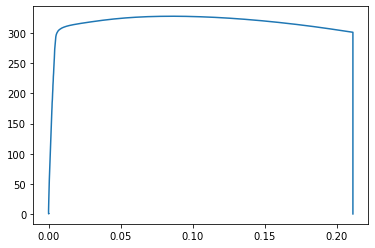

In [10]:
# Taking a first look at data :

plt.plot(dataset['Strain'],dataset['Stress_MPa'])

# 4. Prepering data 

Material standard says, that plastic material starts to loose its elastic properties when elongation is reaching 0.2%. So lets divide dataset, that it only contain elastic area.

In [22]:
# Setting standard variable and making dataframe for linear regression

standard = 0.002

dataset_standard = dataset[dataset['Strain'] < standard]
dataset_standard

,Strain,Stress_MPa
0,-0.000217,0.399656
1,-0.000216,0.405594
2,-0.000220,0.411623
3,-0.000217,0.416826
4,-0.000223,0.421931
...,...,...
348,0.001901,168.943555
349,0.001921,169.803597
350,0.001943,170.661495
351,0.001968,171.516565


In [27]:
# making X and y sets 

X = dataset_standard['Strain'].values.reshape(-1,1)
y = dataset_standard['Stress_MPa'].values.reshape(-1,1)

<function matplotlib.pyplot.show(close=None, block=None)>

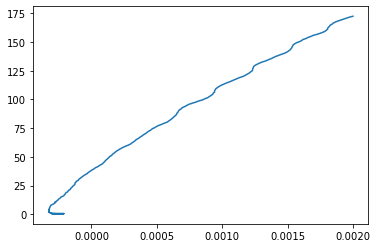

In [28]:
# Plotting X and y

plt.plot(X,y)
plt.show

# 5. Linear Regression

In [37]:
# Setting up train_test_split to perform Linear Regression 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [39]:
# making regression object, then printing its methods intercept and coef which describes params of linear function y = ax+b

regressor = LinearRegression()
regressor.fit(X_train,y_train)

print(regressor.intercept_)
print(regressor.coef_)

[27.24049355]
[[79641.02028701]]


In [32]:
# Making prediction on test set

y_pred = regressor.predict(X_test)

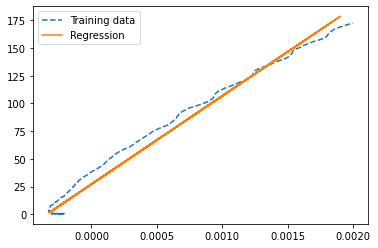

In [41]:
# Plotting training data and regresion 

fig, ax = plt.subplots()

ax.plot(X, y, label = 'Training data', linestyle = '--')
ax.plot(X_test,y_pred, label = "Regression")
ax.legend()

In [54]:
# Checking model quality 

print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error :  6.9660133020245905
Mean Squared Error :  59.36680505103603
Root Mean Squared Error :  7.704985726854789


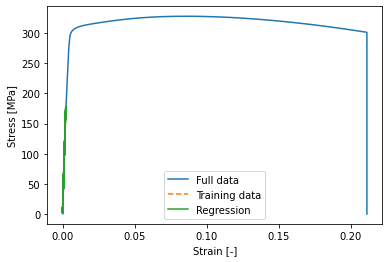

In [36]:
# Plotting full data, training data and regression 

fig, ax = plt.subplots()
ax.plot(strain, stress, label = 'Full data')
ax.plot(X, y, label = 'Training data', linestyle = '--')
ax.plot(X_test,y_pred, label = "Regression")

ax.set_xlabel('Strain [-]')
ax.set_ylabel('Stress [MPa]')
ax.legend()